## Project goal:
## What are the main characteristics which have the most impact on the car price?

In [2]:
#  1. Import Data from Module 2 / import libraries 

import pandas as pd
import numpy as np  

# load data and store in dataframe df: # 
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
# Same csv file as the Cleaned Auto data file
df = pd.read_csv(path)
df.head()   # head( ) empty argument means first 5 rows by default 

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 2. Analyzing Individual Feature Patterns using correlation and Visualization:  df.corr()

In [4]:
# To install seaborn we use the pip which is the python package manager.
%%capture    # Capture is the process or means of obtaining and storing external data, 
              # particularly images or sounds, for use at a later time
! pip install seaborn 

UsageError: Line magic function `%%capture` not found.


In [5]:
# Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### When visualizing individual variables, it is important to first understand what type of variable you are dealing with.
###  This will help us find the right visualization method for that variable.

In [6]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


### ***  Correlation: Pearson Correlation
### *The Pearson Correlation measures the linear dependence between two variables X and Y.
#### **The resulting coefficient is a value between -1 and 1 inclusive, where:
#### 1: Total positive linear correlation.
#### 0: No linear correlation, the two variables most likely do not affect each other.
#### -1: Total negative linear correlation.
### ***Pearson Correlation is the default method of the function "corr". Like before we can calculate the ####Pearson Correlation of the of the 'int64' or 'float64' variables.
#### In Python using corr() function
### df.corr()



In [7]:
# Correlation  by using df.corr()
df.corr()   # find  the correlation of all columns in df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [12]:
df[['bore','stroke' ,'engine-size','compression-ratio','horsepower']].corr()  # find the correlation of specific columns in df

,bore,stroke,engine-size,compression-ratio,horsepower
bore,1.000000,-0.055390,0.572609,0.001263,0.566936
stroke,-0.055390,1.000000,0.209523,0.187923,0.098462
engine-size,0.572609,0.209523,1.000000,0.028889,0.822676
compression-ratio,0.001263,0.187923,0.028889,1.000000,-0.214514
horsepower,0.566936,0.098462,0.822676,-0.214514,1.000000


### From the above table we could see that bore, stroke,  compression-rate dont have too much correlation! 
### Bore ,engine-size and horsepower has positive correlation. Bigger horse power come from a bigger bore ### and bigger engine-size.

In [13]:
df[['horsepower','engine-size' ,"city-mpg","highway-mpg","gas","diesel",'price']].corr()

,horsepower,engine-size,city-mpg,highway-mpg,gas,diesel,price
horsepower,1.000000,0.822676,-0.822214,-0.804575,0.169053,-0.169053,0.809575
engine-size,0.822676,1.000000,-0.650546,-0.679571,-0.070779,0.070779,0.872335
city-mpg,-0.822214,-0.650546,1.000000,0.972044,-0.265676,0.265676,-0.686571
highway-mpg,-0.804575,-0.679571,0.972044,1.000000,-0.198690,0.198690,-0.704692
gas,0.169053,-0.070779,-0.265676,-0.198690,1.000000,-1.000000,-0.110326
diesel,-0.169053,0.070779,0.265676,0.198690,-1.000000,1.000000,0.110326
price,0.809575,0.872335,-0.686571,-0.704692,-0.110326,0.110326,1.000000


###  Analysis: 1. From the above correlation table we could see that the horsepower, engine-size or city or freeway millage usage or
###  how much the vehicle costs doesn't have too much affect on using diesel or gas. 
###  2. The stonger that horsepower the bigger the engine-size( 0.822676 is closer to 1), and higher the price( 0.809575)
###  3. The stonger the horsepower the bigger the engine-size that will lead to less city or highway millege ( -0.8) and
### higher the price! I Horsepower is good predictor of price. 

### *** Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". 
###  ***A great way to visualize these variables is by using scatterplots with fitted lines.
###  In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

C:\Users\cheng\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56358.02018803363)

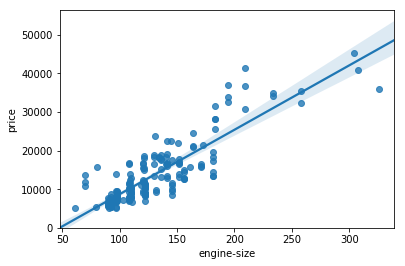

In [11]:
# Let's find the scatterplot of "engine-size" and "price"
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)  # use seaborn.regplot (sns) to plot a regression line
plt.ylim(0,)                 # the y limit is ylim(0,) 0 to infinity 


###  Observation: As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.
###  Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [ ]:
# We can examine the correlation between 'engine-size' and 'price' and see it's approximately 0.87-strong corr

In [12]:
df[["engine-size", "price"]].corr()  # double brackets for DataFrame

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Highway mpg is a potential predictor variable of price

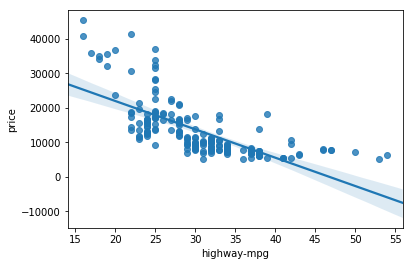

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)

###  Observation: As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

###  We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704

In [16]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### 2b) Weak Linear Relationship
####  Let's see if "Peak-rpm" as a predictor variable of "price".

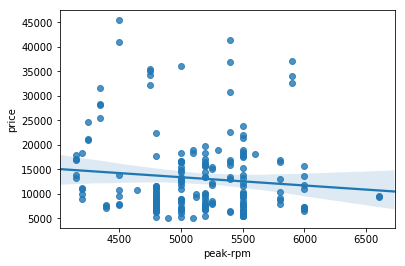

In [17]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [18]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
# Oservation: Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. 
# Also, the data points are very scattered and far from the fitted line, showing lots of variability.
# Therefore it's it is not a reliable variable.

# We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616


In [ ]:
# Let's check horsepwer vs. price

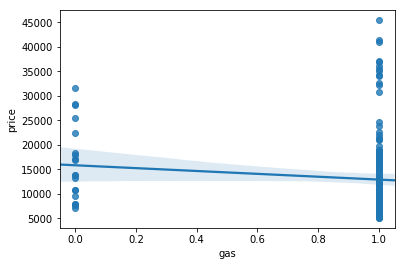

In [23]:
sns.regplot(x='gas', y= "price",data=df)


In [24]:
# check correlation between horsepower and price
df[['gas','price']].corr()

,gas,price
gas,1.000000,-0.110326
price,-0.110326,1.000000


In [ ]:
# It is a weak linear relation between gas and price


In [25]:
#check correlation between stroke and price
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


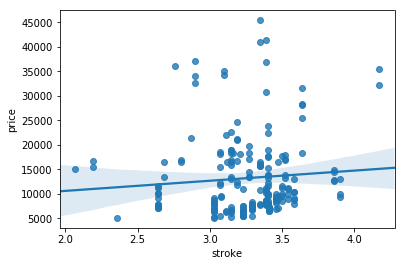

In [26]:
# weak correlation
sns.regplot(x="stroke", y= "price", data = df)

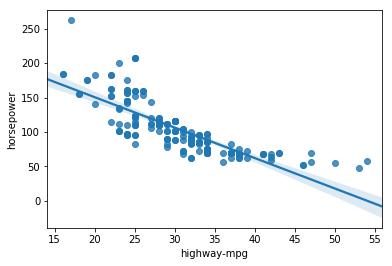

In [36]:
sns.regplot(x="highway-mpg", y="horsepower", data=df)

## It is a negative regression line so the more highway mpg the less engine power, hence less expensive because horse power  is the strongest predictor of car price. 

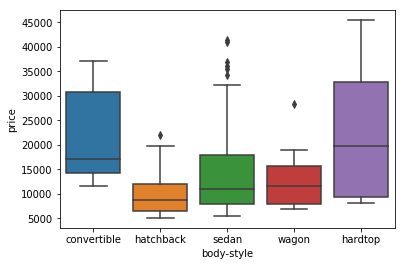

In [30]:
# Use boxplot to visualize the categorical variables: 
# Let's look at the relationship between "body-style" and "price".

sns.boxplot(x="body-style", y="price" , data=df)


## We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.
## ** Let's examine engine "engine-location" and "price"

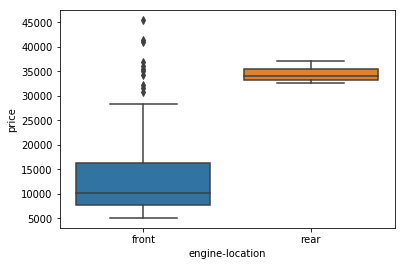

In [32]:
# check "engine-location" to see if it is a good predictor for price
sns.boxplot(x="engine-location",y="price",data=df)

###  Oservation: a car with  the engine located in the rear has a higher price. 

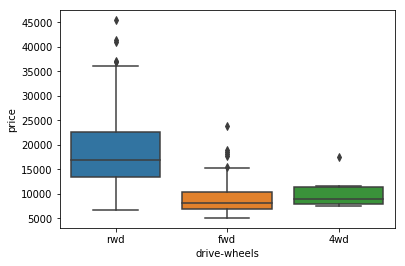

In [35]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

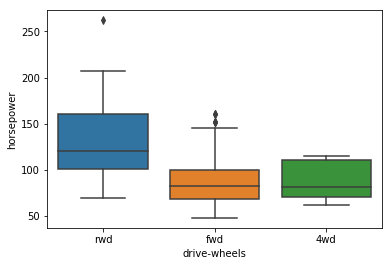

In [38]:
# drive-wheels vs. horsepower
sns.boxplot(x="drive-wheels", y="horsepower", data=df)

### Observation: the rwd car tends to have higer horse power hence be more expensive. 